# Different PIV methods

I've been using two PIV methods for analyzing the flow rate of active nematics in microfluidic channels, `openpiv.extended_area_search_piv` and the ImageJ PIV plugin. Both of them generates spurious large velocities frequently, as in the example below. 

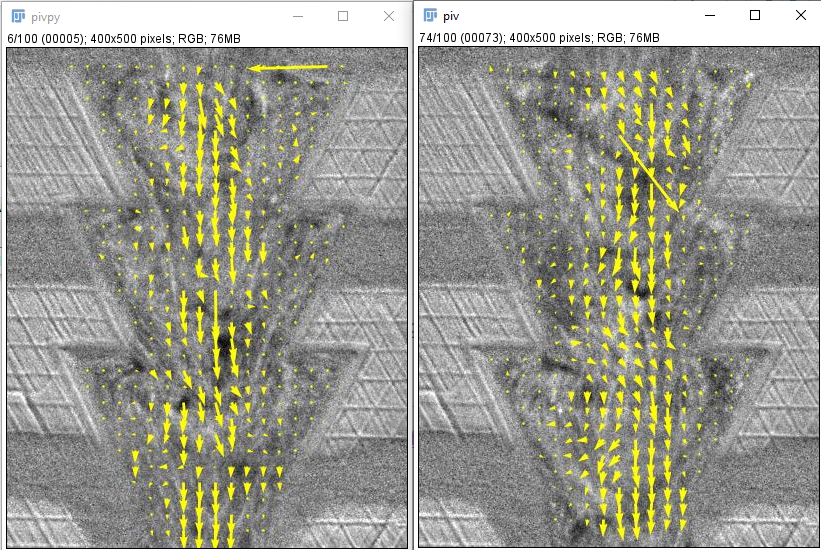

Recently, I learned about the window deformation PIV and I'm interested to see if this new method gives better velocity field on the same images. To benchmark, I use two frame pairs 5-6 and 73-74, where `openpiv.extended_area_search_piv` and ImageJ plugin make mistakes respectively as the test of windef method. 

In [10]:
from skimage import io
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from myimagelib.pivLib import PIV, apply_mask

In [16]:
folder = r"C:\Users\liuzy\Documents\PIV"
stack = io.imread(os.path.join(folder, "pair-1.tif"))
mask = io.imread(os.path.join(folder, "A1.tif"))
I0, I1 = stack

In [17]:
x, y, u, v  = PIV(I0, I1, 32, 16, 1)
pivData = pd.DataFrame({"x": x.flatten(), "y": y.flatten(), "u": u.flatten(), "v": v.flatten()})
piv_masked = apply_mask(pivData, mask)

In [21]:
piv_masked = piv_masked.loc[piv_masked["mask"]==True]

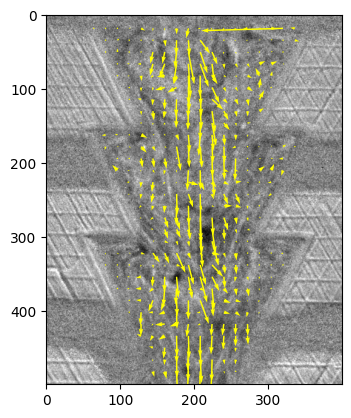

In [23]:
plt.imshow(I0, cmap="gray")
plt.quiver(piv_masked.x, piv_masked.y, piv_masked.u, -piv_masked.v, color="yellow", width=0.005)

In [24]:
from openpiv import windef  # <---- see windef.py for details
from openpiv import tools, scaling, validation, filters, preprocess
import openpiv.pyprocess as process
from openpiv import pyprocess
import numpy as np
import pathlib
import importlib_resources
from time import time
import warnings


import matplotlib.pyplot as plt

In [29]:
settings = windef.PIVSettings()

path = pathlib.Path(r"C:\Users\liuzy\Documents\PIV")

settings = windef.PIVSettings()
settings.filepath_images = path
settings.frame_pattern_a = "pair-1_a.tif"
settings.frame_pattern_b = "pair-1_b.tif"

settings.static_masking = True
settings.static_mask = ~mask
settings.show_all_plots = True
settings.show_plot = True

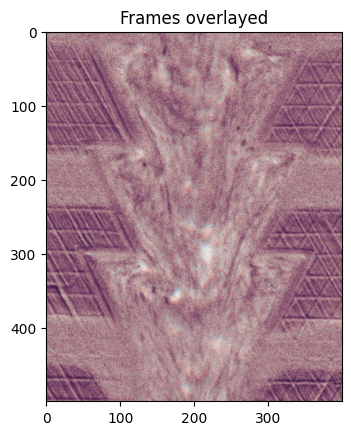

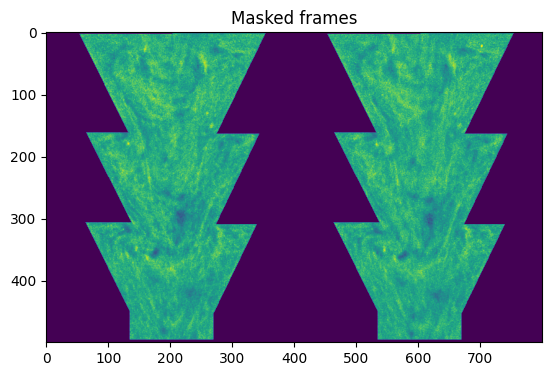

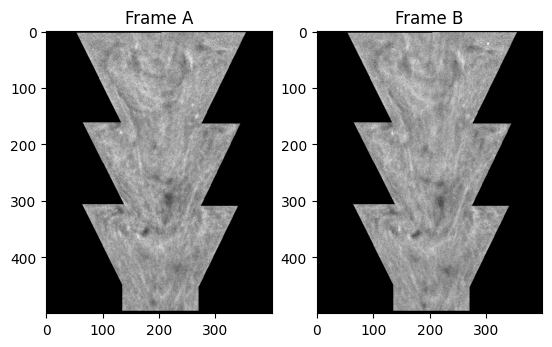

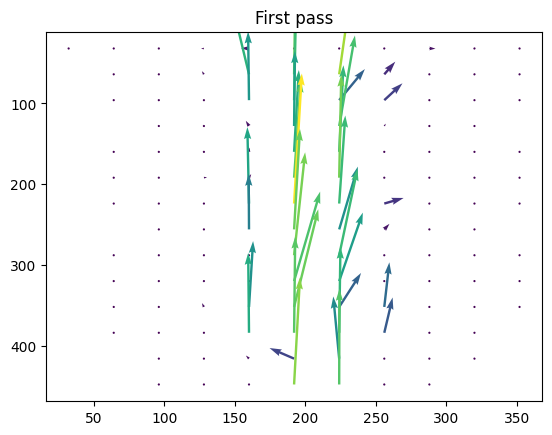

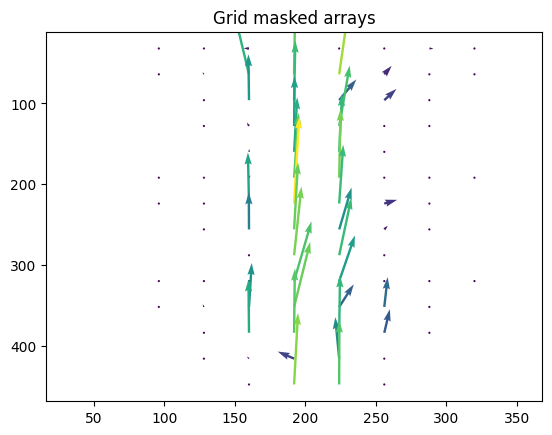

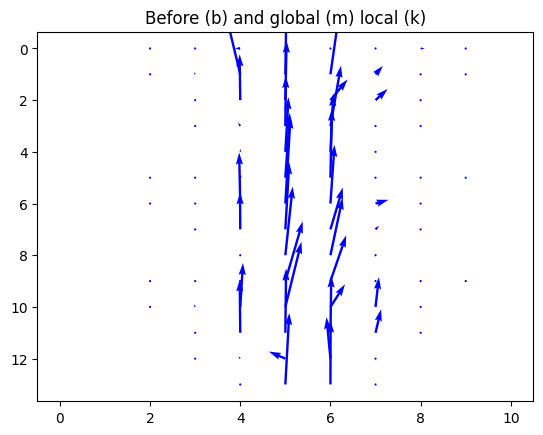

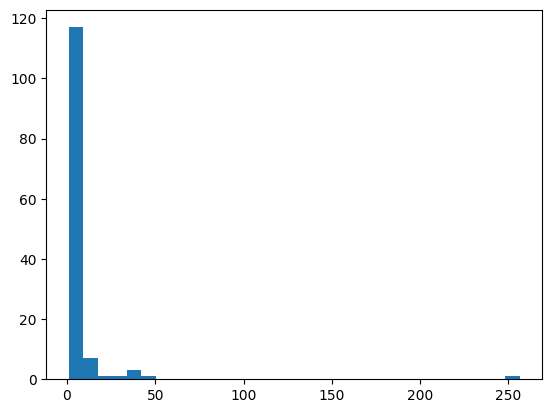

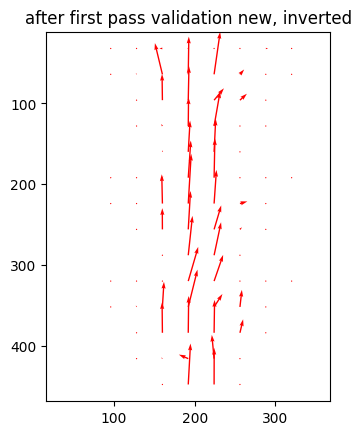

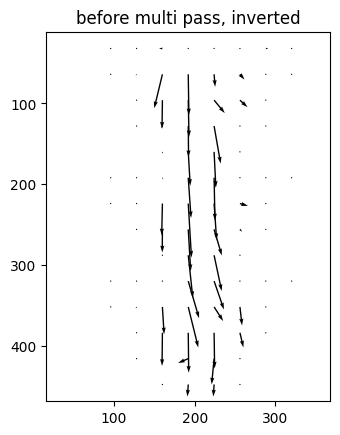

(30, 24) (30, 24) (30, 24)


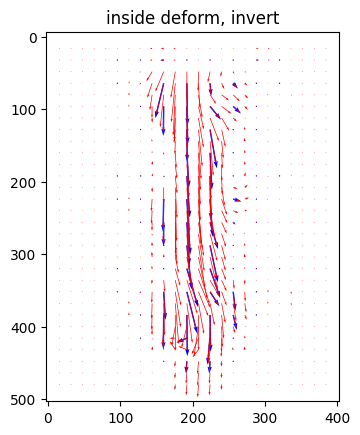

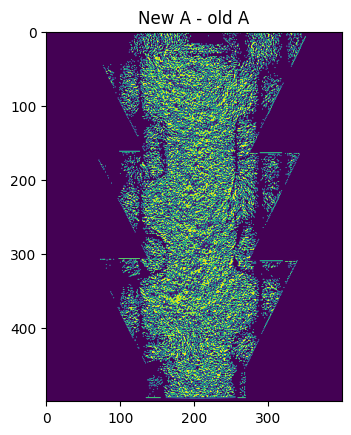

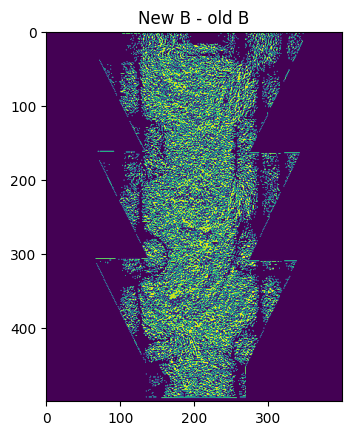

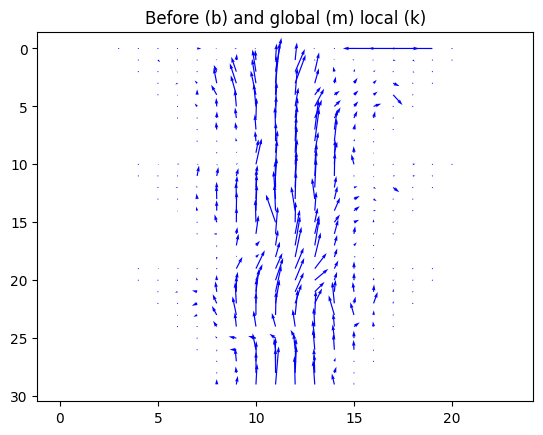

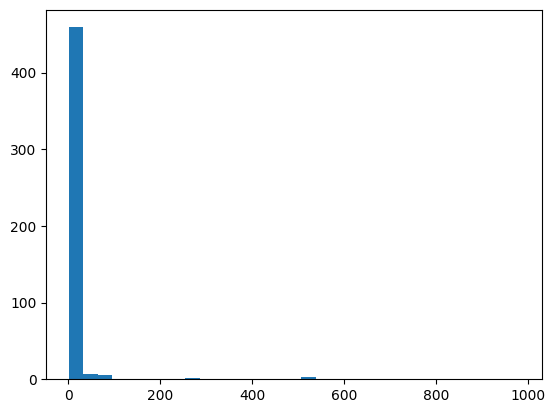

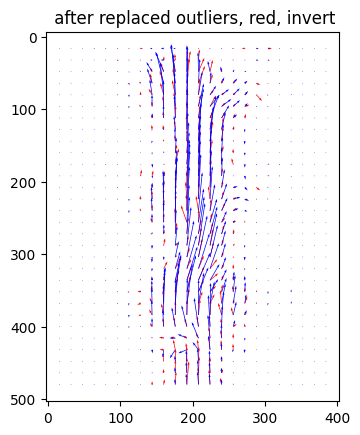

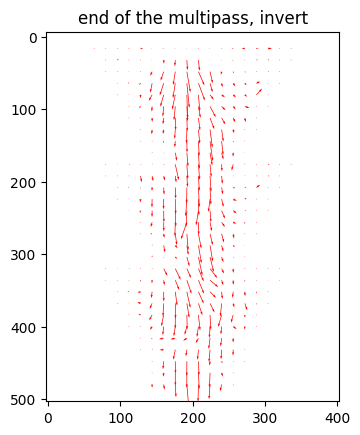

(61, 49) (61, 49) (61, 49)


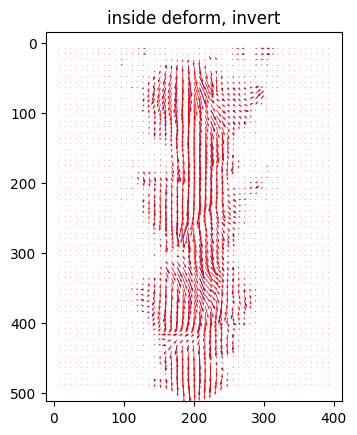

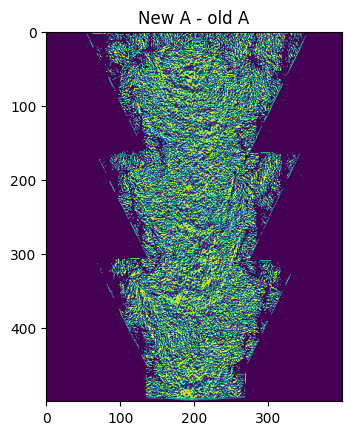

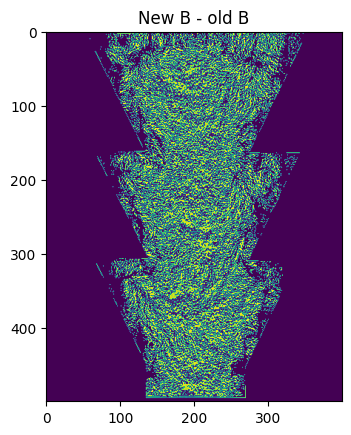

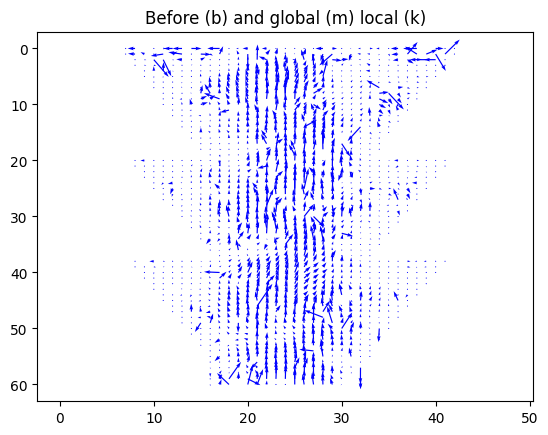

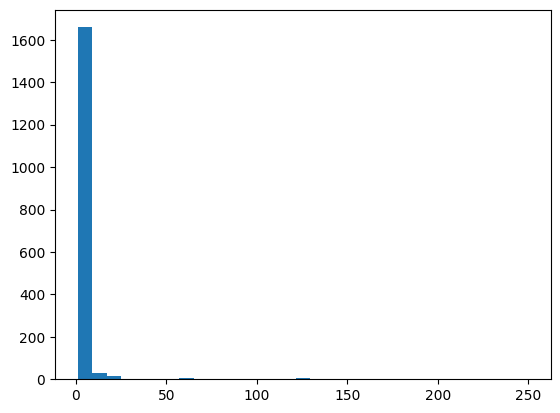

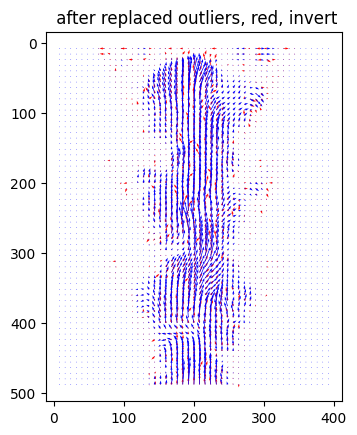

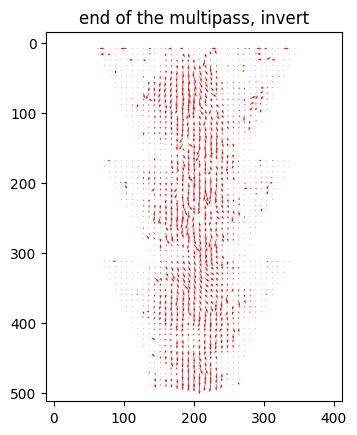

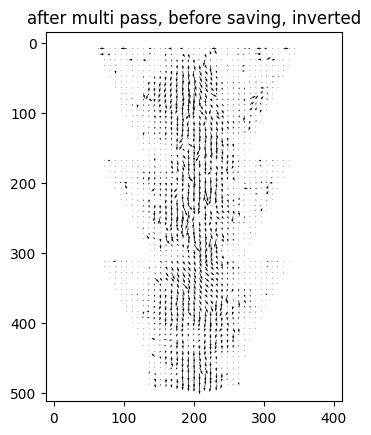

Saving to c:\Users\liuzy\Miniconda3\envs\py39\lib\site-packages\openpiv\data\OpenPIV_results_16_test1\field_A0000.txt


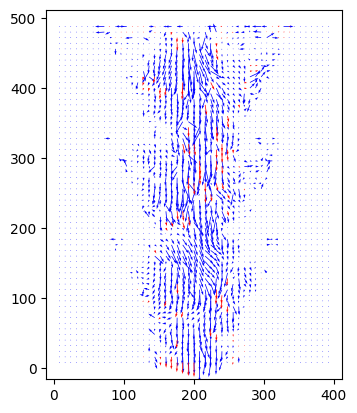

Image Pair 1
pair-1_a pair-1_b


In [30]:
windef.piv(settings)